In [1]:
#mask Maker

In [10]:
from pathlib import Path

import cartopy.crs as ccrs
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import requests
import xarray as xr
from glob import glob
from datetime import datetime
import pdb
from datetime import datetime, timedelta

In [11]:
pip install global-land-mask


Note: you may need to restart the kernel to use updated packages.


In [12]:
from global_land_mask import globe

In [17]:
def maskMaker():
    oci_dir = '/home/jovyan/shared-public/DustBlumes/PACE_OCI_AOD/'

    #date range 
    target_date_range = np.arange(datetime(2024,9,24), datetime(2024,10,10), timedelta(days=1)).astype(datetime)

    #save these for later
    daily_AOD_avg = []
    daily_AOD_anom_avg = []
    daily_plume_mask = []
    
    for day in target_date_range:
        files = sorted(glob(oci_dir + day.strftime('*%Y%m%dT*'))) 
        aods = []
        ssas = []
        lons = []
        lats = []
    
        for file in files:
            datatree = xr.open_datatree(file)
            dataset = xr.merge(datatree.to_dict().values())

            #single granule
            lon = np.array(dataset['longitude'])
            lat = np.array(dataset['latitude'])
            aod = np.squeeze(np.array(dataset['Aerosol_Optical_Depth'][:,:,3]))

            #whole picture
            lons.append(lon)
            lats.append(lat)
            aods.append(aod)

            #extract pixels that are over water and above 0.3 AOD
            over_water_AOD = np.where(globe.is_land(lats,lons) == False, aods, np.nan)
            highs_over_water = np.where(over_water_AOD > 0.3, over_water_AOD, np.nan)

            #1 where there is high AOD over water, 0 where not
            plume_mask = np.where(highs_over_water > 0, 1, 0)
           
        #keep track for the whole time period    
        daily_AOD_avg.append(np.nanmean(over_water_AOD)) #daily average AOD whole picture
        daily_AOD_anom_avg.append(np.nanmean(highs_over_water)) #daily average AOD high (>0.3) over water
        daily_plume_mask.append(plume_mask) #1/0 plume presence 

    #should be length of days in your time range
    print(len(daily_AOD_avg))
    print(len(daily_plume_mask))
    
    #return the 1/0 mask and the lons, lats
    return [daily_plume_mask, lons, lats]

In [21]:
mask, lons, lats = maskMaker() #example

16
16


In [26]:
#EXAMPLE


# def plot_l2_product(
#     lon, lat, data, plot_range, label, title, vmin, vmax, figsize=(12, 4), cmap="jet"):
#     """Make map and histogram (default)."""

#     # Create a figure with two subplots: 1 for map, 1 for histogram
#     fig = plt.figure(figsize=figsize)
#     gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], wspace=0.3)

#     # Map subplot
#     ax_map = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
#     ax_map.set_extent(plot_range, crs=ccrs.PlateCarree())
#     ax_map.coastlines(resolution="110m", color="black", linewidth=0.8)
#     ax_map.gridlines(draw_labels=True)
#     ax_map.set_title(title, fontsize=12)

#     # Assume lon and lat are defined globally or passed in
#     for i in range(len(data)):
#         pm = ax_map.pcolormesh(
#             lon[i], lat[i], data[i], vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), cmap=cmap
#         )
#     plt.colorbar(pm, ax=ax_map, orientation="vertical", pad=0.1, label=label)
#     plt.show()
#     plt.clf()


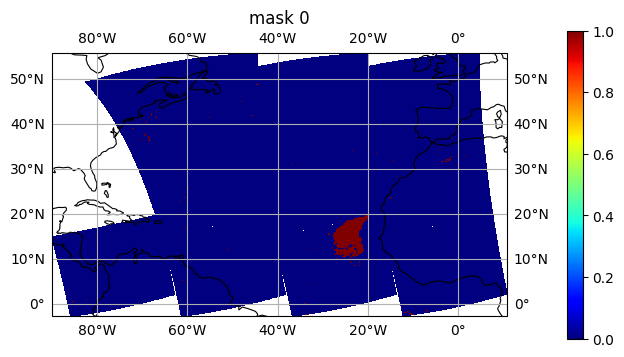

<Figure size 640x480 with 0 Axes>

In [29]:
# plot_range = [np.nanmin(lons), np.nanmax(lons), np.nanmin(lats), np.nanmax(lats)]
# plot_l2_product(lons, lats, mask[0], plot_range=plot_range, label='', title='mask 0', vmin=0, vmax=1, cmap="jet")
